In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Load the train and test datasets

In [2]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv('./data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_X = train_df.drop(['SalePrice'],axis=1).copy()
train_X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
train_X.shape, test_df.shape

((1460, 80), (1459, 80))

## Merge the train_X and test datasets
Merging the train_X and test datasets for full coverage of all possible values in each column, and One Hot Encoding.

In [6]:
df = pd.concat([train_X, test_df], axis=0, ignore_index=True)
df.shape

(2919, 80)

In [7]:
df.to_csv('./temp_data/merged_df.csv', index=False)

### Handling nan values

In [8]:
def check_na(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print(col,'\t',df[col].isnull().sum())

In [9]:
check_na(df)

MSZoning 	 4
LotFrontage 	 486
Alley 	 2721
Utilities 	 2
Exterior1st 	 1
Exterior2nd 	 1
MasVnrType 	 24
MasVnrArea 	 23
BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


In [10]:
check_na(train_X)

LotFrontage 	 259
Alley 	 1369
MasVnrType 	 8
MasVnrArea 	 8
BsmtQual 	 37
BsmtCond 	 37
BsmtExposure 	 38
BsmtFinType1 	 37
BsmtFinType2 	 38
Electrical 	 1
FireplaceQu 	 690
GarageType 	 81
GarageYrBlt 	 81
GarageFinish 	 81
GarageQual 	 81
GarageCond 	 81
PoolQC 	 1453
Fence 	 1179
MiscFeature 	 1406


In [11]:
check_na(test_df)

MSZoning 	 4
LotFrontage 	 227
Alley 	 1352
Utilities 	 2
Exterior1st 	 1
Exterior2nd 	 1
MasVnrType 	 16
MasVnrArea 	 15
BsmtQual 	 44
BsmtCond 	 45
BsmtExposure 	 44
BsmtFinType1 	 42
BsmtFinSF1 	 1
BsmtFinType2 	 42
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 730
GarageType 	 76
GarageYrBlt 	 78
GarageFinish 	 78
GarageCars 	 1
GarageArea 	 1
GarageQual 	 78
GarageCond 	 78
PoolQC 	 1456
Fence 	 1169
MiscFeature 	 1408
SaleType 	 1


## Checking nan value columns for insights

In [12]:
df[df.MSZoning.isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2250,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2904,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [13]:
df.MSZoning.describe()

count     2915
unique       5
top         RL
freq      2265
Name: MSZoning, dtype: object

### MSZoning
|MSSubClass|MSZoning|
|---|---|
|20|RL|
|30|RM|
|70|RM|

<i>To refer:</i><br>temp_data/MSZoning_nan.ipynb

In [14]:
df.at[1915,'MSZoning'] = 'RM'
df.at[2216,'MSZoning'] = 'RL'
df.at[2250,'MSZoning'] = 'RM'
df.at[2904,'MSZoning'] = 'RL'

In [15]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [16]:
check_na(df)

LotFrontage 	 486
Alley 	 2721
Utilities 	 2
Exterior1st 	 1
Exterior2nd 	 1
MasVnrType 	 24
MasVnrArea 	 23
BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### Lot Frontage

In [17]:
df_LotFrontage_nan = df[['Id','LotFrontage','LotArea']][df.LotFrontage.isnull()==True]
df_LotFrontage_nan.sample(5)

,Id,LotFrontage,LotArea
2170,2171,NaN,12250
2204,2205,NaN,9260
1206,1207,NaN,8900
1746,1747,NaN,12732
925,926,NaN,15611


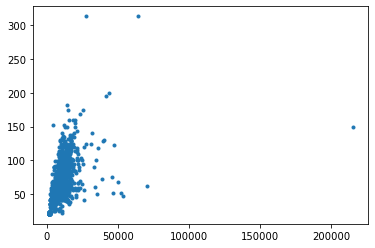

In [18]:
plt.scatter(df.LotArea, df.LotFrontage, marker='.')

In [19]:
df.LotFrontage.corr(df.LotArea)

0.489895570387167

High correlation between LotFrontage and LotArea

Loading the regression model to fill `nan` values of `LotFrontage` by predicting it based on `LotArea`.

In [20]:
with open('./temp_models/LotFrontage_model_xgb.pkl','rb') as f:
    LotFrontage_model = pickle.load(f)

##### Function to replace NaN values based on LotArea
Using the LotFrontage_model regression model

In [21]:
def fillna_LotFrontage(x):
    if x[0]>0:
        return x[0]
    else:
        return LotFrontage_model.predict(np.array([[x[1]]]))[0]

In [22]:
df['LotFrontage'] = df[['LotFrontage','LotArea']].apply(fillna_LotFrontage, axis=1)

In [23]:
check_na(df)

Alley 	 2721
Utilities 	 2
Exterior1st 	 1
Exterior2nd 	 1
MasVnrType 	 24
MasVnrArea 	 23
BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


No more NaN values for LotFrontage

In [24]:
df.loc[[828,569]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
828,829,60,RL,86.165581,28698,Pave,NaN,IR2,Low,AllPub,...,225,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml
569,570,90,RL,62.439941,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal


### Alley

In [25]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

We simply change <code>nan</code> values to the intending <code>NA</code> category as per the data description.

In [26]:
df['Alley'] = df['Alley'].fillna('NA')

In [27]:
df.Alley.unique()

array(['NA', 'Grvl', 'Pave'], dtype=object)

In [28]:
check_na(df)

Utilities 	 2
Exterior1st 	 1
Exterior2nd 	 1
MasVnrType 	 24
MasVnrArea 	 23
BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### Utilities

In [29]:
df.Utilities.unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

Changing the <code>nan</code> values to <code>Other</code>

In [30]:
df['Utilities'] = df['Utilities'].fillna('Other')

In [31]:
check_na(df)

Exterior1st 	 1
Exterior2nd 	 1
MasVnrType 	 24
MasVnrArea 	 23
BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### Exterior1st, Exterior2nd

In [32]:
df.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [33]:
df.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

Converting the <code>nan</code> values to <code>Other</code> in each case as we only have 1 missing value for each

In [34]:
df['Exterior1st'] = df.Exterior1st.fillna('Other')
df['Exterior2nd'] = df.Exterior2nd.fillna('Other')

In [35]:
check_na(df)

MasVnrType 	 24
MasVnrArea 	 23
BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### MasVnrType, MasVnrArea

In [36]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [37]:
df[['MasVnrType','MasVnrArea']][(df['MasVnrType'].isnull()==True) | (df['MasVnrArea'].isnull()==True)]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [38]:
df[['MasVnrType','MasVnrArea']][df.MasVnrType=='None']

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
2913,None,0.0
2914,None,0.0
2915,None,0.0
2916,None,0.0


In [39]:
df[['MasVnrArea','MasVnrType']][df.MasVnrArea==198]

,MasVnrArea,MasVnrType
1705,198.0,Stone
1881,198.0,BrkFace
2545,198.0,Stone
2610,198.0,NaN
2832,198.0,BrkFace
2902,198.0,Stone


3/5 (60%) rows with `MasVnrArea` = 198.0 has 'Stone' as `MasVnrType`
Thus, changing the `nan` value of `MasVnrType` with `MasVnrArea` = 198.0 to 'Stone'

In [40]:
df.at[2610,'MasVnrType'] = 'Stone'

In [41]:
df[['MasVnrArea','MasVnrType']][df.MasVnrArea==198]

,MasVnrArea,MasVnrType
1705,198.0,Stone
1881,198.0,BrkFace
2545,198.0,Stone
2610,198.0,Stone
2832,198.0,BrkFace
2902,198.0,Stone


For the rows where `MasVnrType` and `MasVnrArea` both are `nan`, changing `MasVnrType` to 'None' and `MasVnrArea` to 0

In [42]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

In [43]:
df[['MasVnrType','MasVnrArea']].sample(10)

,MasVnrType,MasVnrArea
1600,None,0.0
2052,None,0.0
698,None,0.0
1167,None,0.0
59,None,0.0
2141,BrkFace,340.0
2748,None,0.0
2636,Stone,252.0
1759,BrkFace,217.0
1959,BrkFace,72.0


In [44]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [45]:
check_na(df)

BsmtQual 	 81
BsmtCond 	 82
BsmtExposure 	 82
BsmtFinType1 	 79
BsmtFinSF1 	 1
BsmtFinType2 	 80
BsmtFinSF2 	 1
BsmtUnfSF 	 1
TotalBsmtSF 	 1
Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### Basement Features

In [46]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [47]:
df.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [48]:
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [49]:
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [50]:
df.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

#### No basement
For all the cases where `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` are `nan`, we conclude that no basement exists and thus change all those `nan` values to 'NA' as per the data description.

In [51]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']][
    (df.BsmtQual.isnull()==True)&
    (df.BsmtCond.isnull()==True)&
    (df.BsmtExposure.isnull()==True)&
    (df.BsmtFinType1.isnull()==True)&
    (df.BsmtFinType2.isnull()==True)
]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2803,NaN,NaN,NaN,NaN,NaN
2804,NaN,NaN,NaN,NaN,NaN
2824,NaN,NaN,NaN,NaN,NaN
2891,NaN,NaN,NaN,NaN,NaN


In [52]:
def fillna_Bsmt(df):
    idx = []
    for i in range(len(df)):
        if (type(df.at[i,'BsmtQual']) is not str) and\
        (type(df.at[i,'BsmtCond']) is not str) and\
        (type(df.at[i,'BsmtExposure']) is not str) and\
        (type(df.at[i,'BsmtFinType1']) is not str) and\
        (type(df.at[i,'BsmtFinType2']) is not str):
            idx.append(i)
    return idx

In [53]:
all_nan_id = fillna_Bsmt(df)

In [54]:
for i in all_nan_id:
    df.at[i,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = 'NA'

The remaining `nan` values

In [55]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']][
    (df.BsmtQual.isnull()==True)|
    (df.BsmtCond.isnull()==True)|
    (df.BsmtExposure.isnull()==True)|
    (df.BsmtFinType1.isnull()==True)|
    (df.BsmtFinType2.isnull()==True)
]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
332,Gd,TA,No,GLQ,NaN,1124.0,479.0
948,Gd,TA,NaN,Unf,Unf,0.0,0.0
1487,Gd,TA,NaN,Unf,Unf,0.0,0.0
2040,Gd,NaN,Mn,GLQ,Rec,1044.0,382.0
2185,TA,NaN,No,BLQ,Unf,1033.0,0.0
2217,NaN,Fa,No,Unf,Unf,0.0,0.0
2218,NaN,TA,No,Unf,Unf,0.0,0.0
2348,Gd,TA,NaN,Unf,Unf,0.0,0.0
2524,TA,NaN,Av,ALQ,Unf,755.0,0.0


Change the remaining BsmtFinType2 to 'NA'

In [56]:
df.at[332,'BsmtFinType2'] = 'NA'

In [57]:
df['BsmtExposure'][(df.BsmtQual=='Gd') & (df.BsmtCond=='TA')].describe()

count     1130
unique       4
top         No
freq       655
Name: BsmtExposure, dtype: object

As per above, the top value for `BsmtExposure` when `BsmtQual` is 'Gd' and `BsmtCond` is 'TA' is 'No', we replace the `nan` values in `BsmtExposure` to 'No'

In [58]:
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [59]:
df['BsmtCond'][(df.BsmtQual=='Gd') & ((df.BsmtExposure=='Mn') | (df.BsmtExposure=='No'))].describe()

count     808
unique      3
top        TA
freq      761
Name: BsmtCond, dtype: object

As per above, the top value for `BsmtCond` when `BsmtExposure` is 'Mn' or 'No' is 'TA', we replace the `nan` values in `BsmtCond` to 'TA'

In [60]:
df.BsmtCond = df.BsmtCond.fillna('TA')

In [61]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']][
    (df.BsmtQual.isnull()==True)|
    (df.BsmtCond.isnull()==True)|
    (df.BsmtExposure.isnull()==True)|
    (df.BsmtFinType1.isnull()==True)|
    (df.BsmtFinType2.isnull()==True)
]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
2217,NaN,Fa,No,Unf,Unf,0.0,0.0
2218,NaN,TA,No,Unf,Unf,0.0,0.0


In [62]:
df['BsmtQual'][
    (df.BsmtExposure=='No')&
    (df.BsmtFinType1=='Unf')&
    (df.BsmtFinType2=='Unf')&
    (df.BsmtFinSF1==0)&
    (df.BsmtFinSF2==0)
].describe()

count     687
unique      4
top        TA
freq      338
Name: BsmtQual, dtype: object

As per above, the top value for `BsmtQual` is 'TA', when `BsmtExposure` is 'No', `BsmtFinType1` and `BsmtFinType2` are 'Unf' and `BsmtFinSF1` and `BsmtFinSF2` are 0, so we replace the `nan` values in `BsmtCond` to 'TA'

In [63]:
df.BsmtQual = df.BsmtQual.fillna('TA')

In [64]:
df[['BsmtQual','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']][
    (df.BsmtFinSF1.isnull()==True)|
    (df.BsmtFinSF2.isnull()==True)|
    (df.BsmtUnfSF.isnull()==True)|
    (df.TotalBsmtSF.isnull()==True)
]

,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,NA,NaN,NaN,NaN,NaN


As the `BsmtQual` is 'NA', the basement doesn't exist, and hence the above `nan` values are replaced with 0

In [65]:
df.at[2120,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']] = 0

In [66]:
check_na(df)

Electrical 	 1
BsmtFullBath 	 2
BsmtHalfBath 	 2
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


In [67]:
df[['BsmtQual','BsmtFullBath','BsmtHalfBath']][(df.BsmtHalfBath.isnull()==True) | (df.BsmtFullBath.isnull()==True)]

,BsmtQual,BsmtFullBath,BsmtHalfBath
2120,NA,NaN,NaN
2188,NA,NaN,NaN


In [68]:
df[['BsmtQual','BsmtFullBath','BsmtHalfBath']][df.BsmtQual=='NA']

,BsmtQual,BsmtFullBath,BsmtHalfBath
17,NA,0.0,0.0
39,NA,0.0,0.0
90,NA,0.0,0.0
102,NA,0.0,0.0
156,NA,0.0,0.0
...,...,...,...
2803,NA,0.0,0.0
2804,NA,0.0,0.0
2824,NA,0.0,0.0
2891,NA,0.0,0.0


We change the `nan` values in `BsmtFullBath` and `BsmtHalfBath` to 0

In [69]:
df.BsmtFullBath = df.BsmtFullBath.fillna(0)
df.BsmtHalfBath = df.BsmtHalfBath.fillna(0)

In [70]:
check_na(df)

Electrical 	 1
KitchenQual 	 1
Functional 	 2
FireplaceQu 	 1420
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### FireplaceQu

In [71]:
df['Fireplaces'][df.FireplaceQu.isnull()==True].describe()

count    1420.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Fireplaces, dtype: float64

For all `nan` values in `FireplaceQu` we replace it with 'NA'

In [72]:
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [73]:
check_na(df)

Electrical 	 1
KitchenQual 	 1
Functional 	 2
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### Electrical

In [74]:
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [75]:
df.Electrical.mode()

0    SBrkr
dtype: object

Fill the `nan` value with the mode value, i.e., SBrkr

In [76]:
df.Electrical = df.Electrical.fillna('SBrkr')

In [77]:
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [78]:
check_na(df)

KitchenQual 	 1
Functional 	 2
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### KitchenQual

In [79]:
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa', nan], dtype=object)

In [80]:
df[['KitchenAbvGr','KitchenQual']][df.KitchenQual.isnull()==True]

,KitchenAbvGr,KitchenQual
1555,1,NaN


In [81]:
df[['KitchenAbvGr','KitchenQual']][df.KitchenAbvGr==1].mode()

,KitchenAbvGr,KitchenQual
0,1,TA


Fill the `nan` value with the mode value, i.e., 'TA'

In [82]:
df.KitchenQual = df.KitchenQual.fillna('TA')

In [83]:
check_na(df)

Functional 	 2
GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### Functional

In [84]:
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

In [85]:
df[['BsmtQual','BedroomAbvGr','Functional']][df.Functional.isnull()==True]

,BsmtQual,BedroomAbvGr,Functional
2216,NA,2,NaN
2473,TA,3,NaN


In [86]:
df.Functional.mode()

0    Typ
dtype: object

Fill the `nan` value with the mode value, i.e., 'Typ'

In [87]:
df.Functional = df.Functional.fillna('Typ')

In [88]:
check_na(df)

GarageType 	 157
GarageYrBlt 	 159
GarageFinish 	 159
GarageCars 	 1
GarageArea 	 1
GarageQual 	 159
GarageCond 	 159
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


## Garage

In [89]:
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [90]:
df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']][
    (df.GarageType.isnull()==False)&
    (df.GarageYrBlt.isnull()==True)&
    (df.GarageFinish.isnull()==True)&
    (df.GarageQual.isnull()==True)&
    (df.GarageCond.isnull()==True)
]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
2126,Detchd,NaN,NaN,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN


In [91]:
df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']][df.GarageType=='Detchd'].mode()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Detchd,1950.0,Unf,TA,TA


For 'Detchd' (Detached) garage types, we fill the `nan` values with the mode observation from above

In [92]:
df.at[2126,['GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = [1950.0,'Unf','TA','TA']
df.at[2576,['GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = [1950.0,'Unf','TA','TA']

In [93]:
check_na(df)

GarageType 	 157
GarageYrBlt 	 157
GarageFinish 	 157
GarageCars 	 1
GarageArea 	 1
GarageQual 	 157
GarageCond 	 157
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


In [94]:
df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']][
    (df.GarageType.isnull()==True)&
    (df.GarageYrBlt.isnull()==True)&
    (df.GarageFinish.isnull()==True)&
    (df.GarageQual.isnull()==True)&
    (df.GarageCond.isnull()==True)
]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2893,NaN,NaN,NaN,NaN,NaN
2909,NaN,NaN,NaN,NaN,NaN
2913,NaN,NaN,NaN,NaN,NaN
2914,NaN,NaN,NaN,NaN,NaN


Fill the `nan` values of the above as per following:

|Column|Value|
|-|-|
|GarageType|'NA'|
|GarageYrBlt|-1|
|GarageFinish|'NA'|
|GarageQual|'NA'|
|GarageCond|'NA'|

In [95]:
df.GarageType = df.GarageType.fillna('NA')
df.GarageYrBlt = df.GarageYrBlt.fillna(-1)
df.GarageFinish = df.GarageFinish.fillna('NA')
df.GarageQual = df.GarageQual.fillna('NA')
df.GarageCond = df.GarageCond.fillna('NA')

In [96]:
check_na(df)

GarageCars 	 1
GarageArea 	 1
PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


In [97]:
df[['GarageType','GarageCars','GarageArea']][df.GarageCars.isnull()==True]

,GarageType,GarageCars,GarageArea
2576,Detchd,NaN,NaN


In [98]:
df[['GarageType','GarageCars','GarageArea']][df.GarageType=='Detchd'].mode()

,GarageType,GarageCars,GarageArea
0,Detchd,2.0,576.0


Fill the `nan` value with the mode value, i.e., 2.0 and 576.0

In [99]:
df.at[2576,['GarageCars','GarageArea']] = [2,576]
df[['GarageType','GarageCars','GarageArea']].loc[[2576]]

,GarageType,GarageCars,GarageArea
2576,Detchd,2.0,576.0


In [100]:
check_na(df)

PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814
SaleType 	 1


### SaleType

In [101]:
df.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth',
       nan], dtype=object)

In [102]:
df[df.SaleType.isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2489,2490,20,RL,85.0,13770,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal


In [103]:
df[['SaleType','SaleCondition']][df.SaleType.isnull()==True]

,SaleType,SaleCondition
2489,NaN,Normal


In [104]:
df[['SaleType','SaleCondition']][df.SaleCondition=='Normal'].mode()

,SaleType,SaleCondition
0,WD,Normal


Fill the `nan` value of `SaleType` with with the mode value, i.e., 'WD' when `SaleCondition` is 'Normal'

In [105]:
df.SaleType = df.SaleType.fillna('WD')

In [106]:
check_na(df)

PoolQC 	 2909
Fence 	 2348
MiscFeature 	 2814


## Remaining features

The remaining 3 features have over 90% of `nan` values. Thus, they are omitted.

In [107]:
df1 = df.drop(['PoolQC','Fence','MiscFeature'],axis=1).copy()

In [108]:
df1.shape

(2919, 77)

## Removing unnecessary features

`Id` Column is omitted as the `SalePrice` is not dependent on it.<br>
`GarageYrBlt`, `YearBuilt`, `MoSold`,  `YrSold` are also removed.

In [109]:
df1.drop(['Id','GarageYrBlt','YearBuilt','MoSold','YrSold'],axis=1,inplace=True)

## Adding a new feature
Adding a new feature `Age` from `YearRemodAdd` using:<br>
`Age` = 2021 - `YearRemodAdd`<br>
Then, `YearRemodAdd` column.

In [110]:
df1['Age'] = 2021 - df1['YearRemodAdd']

In [111]:
df1.Age.describe()

count    2919.000000
mean       36.735526
std        20.894344
min        11.000000
25%        17.000000
50%        28.000000
75%        56.000000
max        71.000000
Name: Age, dtype: float64

In [112]:
df1.drop(['YearRemodAdd'],axis=1,inplace=True)

In [113]:
df1.shape

(2919, 72)

In [114]:
df1.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,Age
793,20,RL,76.000000,9158,Pave,NA,Reg,Lvl,AllPub,Inside,...,168,130,0,0,0,0,0,New,Partial,14
717,20,RL,80.000000,10000,Pave,NA,Reg,Lvl,AllPub,Inside,...,224,0,0,0,0,0,0,WD,Normal,21
2602,180,RM,22.282520,1533,Pave,NA,Reg,Lvl,AllPub,Inside,...,112,97,0,0,0,0,0,WD,Normal,51
1077,20,RL,82.928131,15870,Pave,NA,IR1,Lvl,AllPub,Corner,...,240,32,0,0,0,0,0,WD,Abnorml,52
504,160,RL,24.000000,2308,Pave,NA,Reg,Lvl,AllPub,Inside,...,260,0,0,0,0,0,0,WD,Normal,47


In [115]:
df1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

## Scaling the Data

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
for col in df1.columns:
    if df1[col].dtypes!=object:
        print(col,'\t',df1[col].dtypes)

MSSubClass 	 int64
LotFrontage 	 float64
LotArea 	 int64
OverallQual 	 int64
OverallCond 	 int64
MasVnrArea 	 float64
BsmtFinSF1 	 float64
BsmtFinSF2 	 float64
BsmtUnfSF 	 float64
TotalBsmtSF 	 float64
1stFlrSF 	 int64
2ndFlrSF 	 int64
LowQualFinSF 	 int64
GrLivArea 	 int64
BsmtFullBath 	 float64
BsmtHalfBath 	 float64
FullBath 	 int64
HalfBath 	 int64
BedroomAbvGr 	 int64
KitchenAbvGr 	 int64
TotRmsAbvGrd 	 int64
Fireplaces 	 int64
GarageCars 	 float64
GarageArea 	 float64
WoodDeckSF 	 int64
OpenPorchSF 	 int64
EnclosedPorch 	 int64
3SsnPorch 	 int64
ScreenPorch 	 int64
PoolArea 	 int64
MiscVal 	 int64
Age 	 int64


### Features to scale
<ol>
    <li>LotFrontage</li>
    <li>LotArea</li>
    <li>Age</li>
    <li>OverallQual</li>
    <li>OverallCond</li>
    <li>MasVnrArea</li>
    <li>1stFlrSF</li>
    <li>2ndFlrSF</li>
    <li>LowQualFinSF</li>
    <li>GrLivArea</li>
    <li>GarageArea</li>
    <li>WoodDeckSF</li>
    <li>OpenPorchSF</li>
    <li>EnclosedPorch</li>
    <li>3SsnPorch</li>
    <li>ScreenPorch</li>
    <li>PoolArea</li>
    <li>MiscVal</li>
    <li>BsmtFinSF1</li>
    <li>BsmtFinSF2</li>
    <li>BsmtUnfSF</li>
    <li>TotalBsmtSF</li>
    <li>BsmtFullBath</li>
    <li>BsmtHalfBath</li>
    <li>FullBath</li>
    <li>HalfBath</li>
    <li>BedroomAbvGr</li>
    <li>KitchenAbvGr</li>
    <li>TotRmsAbvGrd</li>
    <li>GarageCars</li>
    </ol>

In [118]:
scaler = MinMaxScaler()

In [119]:
df_scaled = df1.copy()

In [120]:
df_scaled[[
    'LotFrontage',
    'LotArea',
    'Age',
    'OverallQual',
    'OverallCond',
    'MasVnrArea',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'GarageCars',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Fireplaces'
]] = scaler.fit_transform(df_scaled[[
    'LotFrontage',
    'LotArea',
    'Age',
    'OverallQual',
    'OverallCond',
    'MasVnrArea',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'GarageCars',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Fireplaces'
]])

In [121]:
df_scaled[[
    'LotFrontage',
    'LotArea',
    'Age',
    'MasVnrArea',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'GarageCars',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Fireplaces'
]].sample(5)

,LotFrontage,LotArea,Age,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Fireplaces
2615,0.219178,0.043156,0.900000,0.15250,0.144928,0.000000,0.0,0.129992,0.210349,0.000000,...,0.0,0.250,0.333333,0.230769,0.2,0.136960,0.000000,0.100599,0.164975,0.50
2451,0.184932,0.057024,0.383333,0.00000,0.205419,0.553027,0.0,0.399397,0.387097,0.000000,...,0.0,0.375,0.333333,0.461538,0.4,0.000000,0.000000,0.350599,0.134043,0.25
1,0.202055,0.038795,0.566667,0.00000,0.194917,0.000000,0.0,0.174830,0.309140,0.209270,...,0.0,0.375,0.333333,0.307692,0.4,0.173281,0.000000,0.121575,0.206547,0.25
1223,0.232877,0.043843,0.983333,0.02750,0.378492,0.000000,0.0,0.339488,0.354839,0.000000,...,0.0,0.500,0.333333,0.384615,0.4,0.133948,0.000000,0.590753,0.349591,0.00
1923,0.356164,0.061319,0.350000,0.19375,0.240496,0.000000,0.0,0.215712,0.388441,0.157303,...,0.5,0.375,0.333333,0.384615,0.4,0.160170,0.408912,0.050086,0.269231,0.25


### Categorical Features
<ol>
    <li>MSSubClass</li>
    <li>MSZoning</li>
    <li>Street</li>
    <li>Alley</li>
    <li>LotShape</li>
    <li>LandContour</li>
    <li>Utilities</li>
    <li>LotConfig</li>
    <li>LandSlope</li>
    <li>Neighborhood</li>
    <li>Condition1</li>
    <li>Condition2</li>
    <li>BldgType</li>
    <li>HouseStyle</li>
    <li>OverallQual</li>
    <li>OverallCond</li>
    <li>RoofStyle</li>
    <li>RoofMatl</li>
    <li>Exterior1st</li>
    <li>Exterior2nd</li>
    <li>MasVnrType</li>
    <li>ExterQual</li>
    <li>ExterCond</li>
    <li>Foundation</li>
    <li>BsmtQual</li>
    <li>BsmtCond</li>
    <li>BsmtExposure</li>
    <li>BsmtFinType1</li>
    <li>BsmtFinType2</li>
    <li>Heating</li>
    <li>HeatingQC</li>
    <li>CentralAir</li>
    <li>Electrical</li>
    <li>KitchenQual</li>
    <li>Functional</li>
    <li>FireplaceQu</li>
    <li>GarageType</li>
    <li>GarageFinish</li>
    <li>GarageQual</li>
    <li>GarageCond</li>
    <li>PavedDrive</li>
    <li>SaleType</li>
    <li>SaleCondition</li>

#### One Hot Encoding for Categorical features

In [122]:
df_final = df_scaled.copy()

In [123]:
df_final = pd.get_dummies(df_final, drop_first=True)

In [124]:
df_final.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
775,120,0.037671,0.014957,0.555556,0.500,0.200000,0.153437,0.0,0.144692,0.197054,...,0,0,0,0,1,0,0,0,1,0
145,160,0.010274,0.005712,0.555556,0.500,0.031250,0.000000,0.0,0.415240,0.158756,...,0,0,0,0,1,0,0,0,1,0
692,60,0.071918,0.116282,0.666667,0.500,0.183125,0.170978,0.0,0.104880,0.198036,...,0,0,0,0,1,0,0,0,1,0
1184,20,0.099315,0.158139,0.444444,0.375,0.141250,0.205351,0.0,0.176798,0.257283,...,0,0,0,0,1,0,0,0,1,0
2502,50,0.099315,0.029213,0.333333,0.500,0.000000,0.000000,0.0,0.407106,0.155646,...,0,0,0,0,1,0,0,0,1,0


`MSSubClass` has integers value, even though it is a categorical feature.

In [125]:
ohe_MSSubClass = pd.get_dummies(df_final['MSSubClass'],prefix='MSSubClass',drop_first=True)

In [126]:
ohe_MSSubClass

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2915,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2917,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [127]:
df_final = pd.concat([df_final, ohe_MSSubClass], axis=1)
df_final.drop(['MSSubClass'], axis=1, inplace=True)
df_final

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0.150685,0.033420,0.666667,0.500,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,...,0,0,0,0,0,0,0,0,0,0
1,0.202055,0.038795,0.555556,0.875,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,...,0,0,0,0,0,0,0,0,0,0
2,0.160959,0.046507,0.666667,0.500,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,...,0,0,0,0,0,0,0,0,0,0
3,0.133562,0.038561,0.666667,0.500,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,...,1,0,0,0,0,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.500,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.000000,0.002973,0.333333,0.750,0.00000,0.000000,0.0,0.233733,0.089362,0.044528,...,0,0,0,0,0,0,0,1,0,0
2915,0.000000,0.002776,0.333333,0.500,0.00000,0.044649,0.0,0.125856,0.089362,0.044528,...,0,0,0,0,0,0,0,1,0,0
2916,0.476027,0.087406,0.444444,0.750,0.00000,0.216867,0.0,0.000000,0.200327,0.186936,...,0,0,0,0,0,0,0,0,0,0
2917,0.140411,0.042726,0.444444,0.500,0.00000,0.059709,0.0,0.246147,0.149264,0.133585,...,0,0,0,1,0,0,0,0,0,0


# Separate the dataset back into train and test datasets

In [128]:
train_X = df_final[:1460].copy()
train_X

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0.150685,0.033420,0.666667,0.500,0.122500,0.125089,0.000000,0.064212,0.140098,0.109641,...,0,0,0,0,0,0,0,0,0,0
1,0.202055,0.038795,0.555556,0.875,0.000000,0.173281,0.000000,0.121575,0.206547,0.194917,...,0,0,0,0,0,0,0,0,0,0
2,0.160959,0.046507,0.666667,0.500,0.101250,0.086109,0.000000,0.185788,0.150573,0.123083,...,0,0,0,0,0,0,0,0,0,0
3,0.133562,0.038561,0.666667,0.500,0.000000,0.038271,0.000000,0.231164,0.123732,0.131695,...,1,0,0,0,0,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.500,0.218750,0.116052,0.000000,0.209760,0.187398,0.170342,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.555556,0.500,0.000000,0.000000,0.000000,0.407962,0.155974,0.130015,...,0,0,0,0,0,0,0,0,0,0
1456,0.219178,0.055505,0.555556,0.625,0.074375,0.139972,0.106815,0.252140,0.252373,0.365259,...,0,0,0,0,0,0,0,0,0,0
1457,0.154110,0.036187,0.666667,1.000,0.000000,0.048724,0.000000,0.375428,0.188543,0.179374,...,1,0,0,0,0,0,0,0,0,0
1458,0.160959,0.039342,0.444444,0.625,0.000000,0.008682,0.674312,0.000000,0.176432,0.156270,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test = df_final[1460:].copy()
test

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
1460,0.202055,0.048246,0.444444,0.625,0.00000,0.082920,0.094364,0.115582,0.144354,0.118042,...,0,0,0,0,0,0,0,0,0,0
1461,0.205479,0.060609,0.555556,0.625,0.06750,0.163536,0.000000,0.173801,0.217512,0.208990,...,0,0,0,0,0,0,0,0,0,0
1462,0.181507,0.058566,0.444444,0.500,0.00000,0.140149,0.000000,0.058647,0.151882,0.124764,...,0,0,0,0,0,0,0,0,0,0
1463,0.195205,0.040562,0.555556,0.625,0.01250,0.106662,0.000000,0.138699,0.151555,0.124344,...,0,0,0,0,0,0,0,0,0,0
1464,0.075342,0.017318,0.777778,0.500,0.00000,0.046598,0.000000,0.435360,0.209493,0.198698,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.000000,0.002973,0.333333,0.750,0.00000,0.000000,0.000000,0.233733,0.089362,0.044528,...,0,0,0,0,0,0,0,1,0,0
2915,0.000000,0.002776,0.333333,0.500,0.00000,0.044649,0.000000,0.125856,0.089362,0.044528,...,0,0,0,0,0,0,0,1,0,0
2916,0.476027,0.087406,0.444444,0.750,0.00000,0.216867,0.000000,0.000000,0.200327,0.186936,...,0,0,0,0,0,0,0,0,0,0
2917,0.140411,0.042726,0.444444,0.500,0.00000,0.059709,0.000000,0.246147,0.149264,0.133585,...,0,0,0,1,0,0,0,0,0,0


In [130]:
train = pd.concat([train_X,train_df.SalePrice],axis=1)
train

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,0.150685,0.033420,0.666667,0.500,0.122500,0.125089,0.000000,0.064212,0.140098,0.109641,...,0,0,0,0,0,0,0,0,0,208500
1,0.202055,0.038795,0.555556,0.875,0.000000,0.173281,0.000000,0.121575,0.206547,0.194917,...,0,0,0,0,0,0,0,0,0,181500
2,0.160959,0.046507,0.666667,0.500,0.101250,0.086109,0.000000,0.185788,0.150573,0.123083,...,0,0,0,0,0,0,0,0,0,223500
3,0.133562,0.038561,0.666667,0.500,0.000000,0.038271,0.000000,0.231164,0.123732,0.131695,...,0,0,0,0,0,0,0,0,0,140000
4,0.215753,0.060576,0.777778,0.500,0.218750,0.116052,0.000000,0.209760,0.187398,0.170342,...,0,0,0,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.555556,0.500,0.000000,0.000000,0.000000,0.407962,0.155974,0.130015,...,0,0,0,0,0,0,0,0,0,175000
1456,0.219178,0.055505,0.555556,0.625,0.074375,0.139972,0.106815,0.252140,0.252373,0.365259,...,0,0,0,0,0,0,0,0,0,210000
1457,0.154110,0.036187,0.666667,1.000,0.000000,0.048724,0.000000,0.375428,0.188543,0.179374,...,0,0,0,0,0,0,0,0,0,266500
1458,0.160959,0.039342,0.444444,0.625,0.000000,0.008682,0.674312,0.000000,0.176432,0.156270,...,0,0,0,0,0,0,0,0,0,142125


In [131]:
train.to_csv('./temp_data/final_train_data.csv', index=False)
test.to_csv('./temp_data/final_test_data.csv', index=False)